# Assignment 12: Supervised Machine Learning Practice
Use this notebook to follow along with the tasks in the `AO8-Data_Wrangling.ipynb` notebook.

## Instructions
For each task, use the cell below to write and test your code.  You may add additional cells for any task as needed or desired.  

## Task 1a: Setup

Import the following package sets:
+ packages for data management
+ pacakges for visualization
+ packages for machine learning

Remember to activate the `%matplotlib inline` magic.

In [1]:
%matplotlib inline

# Data Management
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Task 2a: Data Exploration

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 do you see any problems with this iris dataset? If so, please describe them in the practice notebook.  If not, simply indicate that there are no issues.

In [3]:
iris = sns.load_dataset('iris')

## Task 2b:  Make Assumptions

After reviewing the data in sections 2.1, 2.2, 2.3 and 2.4 are there any columns that would make poor predictors of species? 

**Hint**: columns that are poor predictors are those with too many missing values, those with no difference in variation when grouped by the outcome class, variables with high levels of collinearity.

In [5]:
iris.shape

(150, 5)

In [6]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [10]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
iris.duplicated().sum()

1

In [12]:
iris[iris.duplicated(keep = False)]

,sepal_length,sepal_width,petal_length,petal_width,species
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [13]:
iris.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

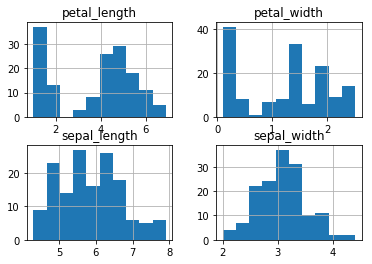

In [14]:
iris.hist()
plt.show()

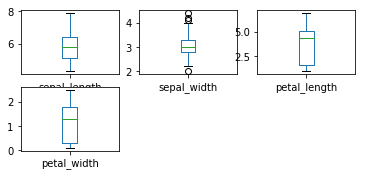

In [15]:
iris.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

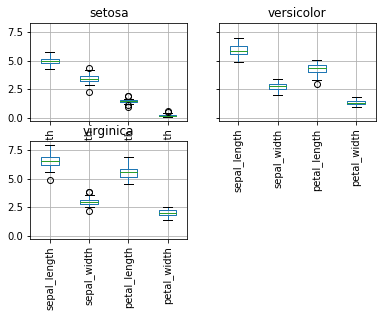

In [16]:
iris.groupby(by='species').boxplot(rot=90);

C:\Users\dslim\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


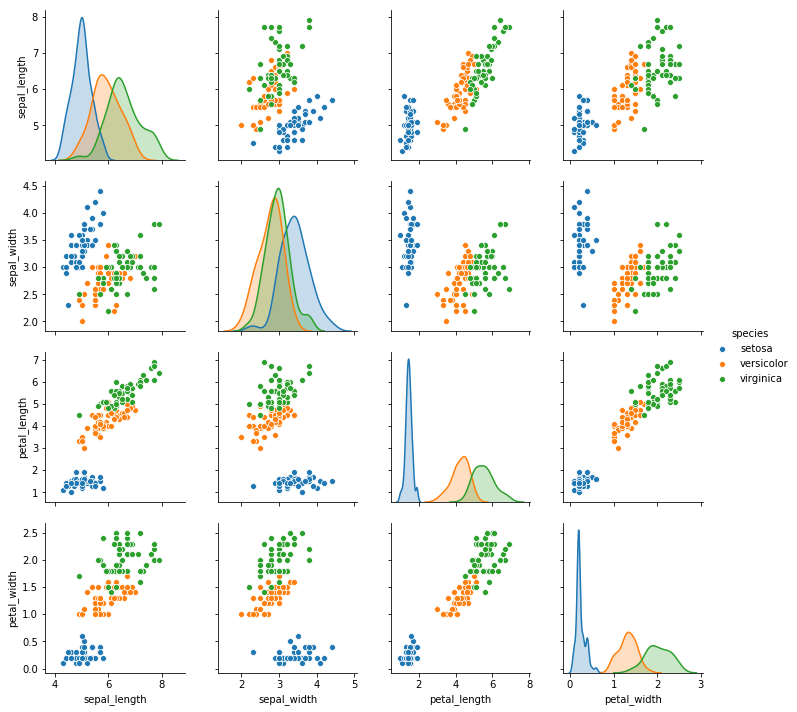

In [17]:
sns.pairplot(iris, hue='species');

## Task 3a: Practice with the random forest classifier

Now that you have learned how to perform supervised machine learning using a variety of algorithms, lets practice using a new algorithm we haven't looked at yet: the Random Forest Classifier.  The random forest classifier builds multiple decision trees and merges them together.  Review the sklearn [online documentation for the RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).  For this task:

1. Perform a 10-fold cross-validation strategy to see how well the random forest classifier performs with the iris data
2. Use a boxplot to show the distribution of accuracy
3. Use the `fit` and `predict` functions to see how well it performs with the testing data.
4. Plot the confusion matrix
5. Print the classification report.


In [18]:
X = iris.loc[:,'sepal_length':'petal_width'].values

In [19]:
Y = iris['species'].values

In [20]:
X = preprocessing.robust_scale(X)
X

array([[-0.53846154,  1.        , -0.84285714, -0.73333333],
       [-0.69230769,  0.        , -0.84285714, -0.73333333],
       [-0.84615385,  0.4       , -0.87142857, -0.73333333],
       [-0.92307692,  0.2       , -0.81428571, -0.73333333],
       [-0.61538462,  1.2       , -0.84285714, -0.73333333],
       [-0.30769231,  1.8       , -0.75714286, -0.6       ],
       [-0.92307692,  0.8       , -0.84285714, -0.66666667],
       [-0.61538462,  0.8       , -0.81428571, -0.73333333],
       [-1.07692308, -0.2       , -0.84285714, -0.73333333],
       [-0.69230769,  0.2       , -0.81428571, -0.8       ],
       [-0.30769231,  1.4       , -0.81428571, -0.73333333],
       [-0.76923077,  0.8       , -0.78571429, -0.73333333],
       [-0.76923077,  0.        , -0.84285714, -0.8       ],
       [-1.15384615,  0.        , -0.92857143, -0.8       ],
       [ 0.        ,  2.        , -0.9       , -0.73333333],
       [-0.07692308,  2.8       , -0.81428571, -0.6       ],
       [-0.30769231,  1.

In [21]:
Xt, Xv, Yt, Yv = model_selection.train_test_split(X, Y, test_size=0.2, random_state=10)

In [22]:
kfold = model_selection.KFold(n_splits=10, random_state=10)

In [23]:
results = {
    'LogisticRegression' : np.zeros(10),
    'LinearDiscriminantAnalysis' : np.zeros(10),
    'KNeighborsClassifier' : np.zeros(10),
    'DecisionTreeClassifier' : np.zeros(10),
    'GaussianNB' : np.zeros(10),
    'SVC' : np.zeros(10)
}
results

{'LogisticRegression': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'LinearDiscriminantAnalysis': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'KNeighborsClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'DecisionTreeClassifier': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'GaussianNB': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'SVC': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])}

In [24]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([1.        , 0.66666667, 0.91666667, 0.83333333, 1.        ,
       0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ])

In [25]:
# Create the LogisticRegression object prepared for a multinomial outcome validation set.
alg = LogisticRegression(solver='lbfgs', multi_class="auto")

# Execute the cross-validation strategy
results['LogisticRegression'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                scoring="accuracy", error_score=np.nan)

# Take a look at the scores for each of the 10-fold runs.
results['LogisticRegression']

array([1.        , 0.66666667, 0.91666667, 0.83333333, 1.        ,
       0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ])

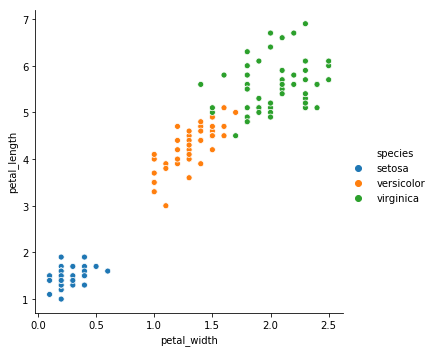

In [26]:
sns.relplot(x="petal_width", y="petal_length", hue="species", data=iris);

In [27]:
# Create the KNeighborsClassifier object with defaults.
alg = KNeighborsClassifier()

# Execute the cross-validation strategy
results['KNeighborsClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['KNeighborsClassifier']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       1.        , 1.        , 0.91666667, 1.        , 1.        ])

In [28]:
# Create the DecisionTreeClassifier object with defaults.
alg = DecisionTreeClassifier()

# Execute the cross-validation strategy
results['DecisionTreeClassifier'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['DecisionTreeClassifier']

array([0.91666667, 0.83333333, 0.91666667, 0.91666667, 1.        ,
       1.        , 1.        , 0.83333333, 0.91666667, 1.        ])

In [29]:
# Create the GaussianNB object with defaults.
alg = GaussianNB()

# Execute the cross-validation strategy
results['GaussianNB'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['GaussianNB']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       0.91666667, 1.        , 0.91666667, 0.91666667, 1.        ])

In [30]:
# Create the SVC object with defaults.
alg = SVC(gamma='auto')

# Execute the cross-validation strategy
results['SVC'] = model_selection.cross_val_score(alg, Xt, Yt, cv=kfold, 
                                                                  scoring="accuracy", error_score=np.nan)
# Take a look at the scores for each of the 10-fold runs.
results['SVC']

array([1.        , 0.75      , 0.91666667, 0.83333333, 1.        ,
       0.83333333, 1.        , 0.91666667, 0.91666667, 1.        ])

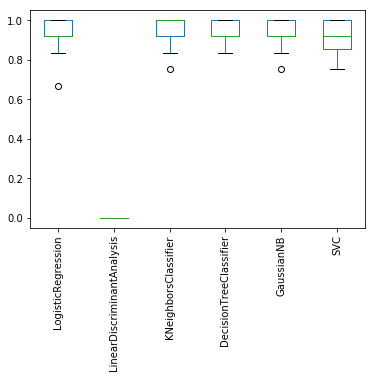

In [31]:
pd.DataFrame(results).plot(kind="box", rot=90);

In [32]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = LinearDiscriminantAnalysis()

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype='<U10')

In [33]:
accuracy_score(Yv, predictions)

1.0

In [34]:
labels = ['versicolor', 'virginica', 'setosa']
cm = confusion_matrix(Yv, predictions, labels=labels)
print(cm)

[[13  0  0]
 [ 0  7  0]
 [ 0  0 10]]


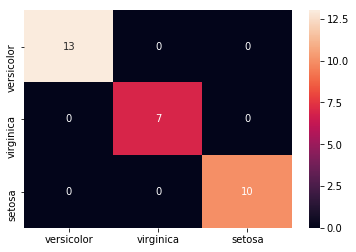

In [35]:
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

In [36]:
cr = classification_report(Yv, predictions)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [37]:
# Create the LinearDiscriminantAnalysis object with defaults.
alg = KNeighborsClassifier()

# Create a new model using all of the training data.
alg.fit(Xt, Yt)

# Using the testing data, predict the iris species.
predictions = alg.predict(Xv)

# Let's see the predictions
predictions

array(['versicolor', 'virginica', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'versicolor', 'virginica'],
      dtype=object)

In [38]:
accuracy_score(Yv, predictions)

0.9666666666666667

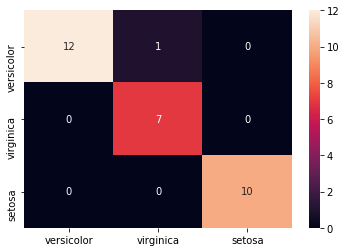

In [39]:
labels = ['versicolor', 'virginica', 'setosa']
cm = confusion_matrix(Yv, predictions, labels=labels)
sns.heatmap(cm, annot=True, xticklabels=labels, yticklabels=labels);

In [40]:
cr = classification_report(Yv, predictions)
print(cr)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.92      0.96        13
   virginica       0.88      1.00      0.93         7

   micro avg       0.97      0.97      0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

